<a href="https://colab.research.google.com/github/tomaszpakula/Data-Science/blob/main/1_Data_Visualisation_laptop_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing dependencies between laptop parametres and price

###1. Basic informations about dataset

At first, let import necessary libraries and import our data set. Data set is downloaded from https://www.kaggle.com/datasets/aemyjutt/laptop-price-analysis

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("laptops_train.csv")
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Now we see, what kind of data we have. We see that Screen Size and Weight are numerical data, but there are some problems. <br>
1) The weight is given with 'kg' and the screen size with '"'<br/>
2) Some of Weight and Screen Size can be NaN, so it can be difficult to get some of basic statics about this data

Let's change type of these two columns from string to float. Then we can ignore data, when Screen Size or Weight have value 'NaN'

In [ ]:
data['Screen Size']=data['Screen Size'].str.replace('"','').astype("float64")
data['Weight']=data['Weight'].str.replace('kg','').astype("float64")

data = data[data['Screen Size'].notna()]
data = data[data['Weight'].notna()]
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20


Now, when we preprocessed are data, we can show basics statistics of the numerical variables. We see that mean, and standard devation of our numerical data can be very useful. For example now we see that avarage Screen Size is 15" and avarage weight is around 2kg. Maximum and minimum of our data can be useful too.

In [ ]:
data_numerical = ['Screen Size', 'Weight','Price']
data[data_numerical].describe()

,Screen Size,Weight,Price
count,977.00000,977.000000,9.770000e+02
mean,15.05261,2.039128,1.001899e+07
std,1.41895,0.666009,6.306430e+06
min,10.10000,0.690000,1.706375e+06
25%,14.00000,1.500000,5.326308e+06
50%,15.60000,2.020000,8.527428e+06
75%,15.60000,2.300000,1.311570e+07
max,18.40000,4.700000,5.423231e+07


###2. Visualising relation between variables

Now we want to do some plots and see some relations between variables

####2.1 Avarage price of laptops by manufacturers

We want to compare avarage price of laptops by manufacturers on the plot. At first we need unique list of all manufacturers

In [ ]:
manufacturers = list(set(data['Manufacturer']))
print(manufacturers)

['Apple', 'Toshiba', 'Vero', 'Samsung', 'MSI', 'Razer', 'HP', 'Microsoft', 'Google', 'Acer', 'LG', 'Lenovo', 'Fujitsu', 'Mediacom', 'Chuwi', 'Dell', 'Huawei', 'Asus', 'Xiaomi']


Now we can visualize it, and see that the avarage higher price have laptops from Razer, and the lower one have laptops from Vero, Mediacom, and Chuwi.

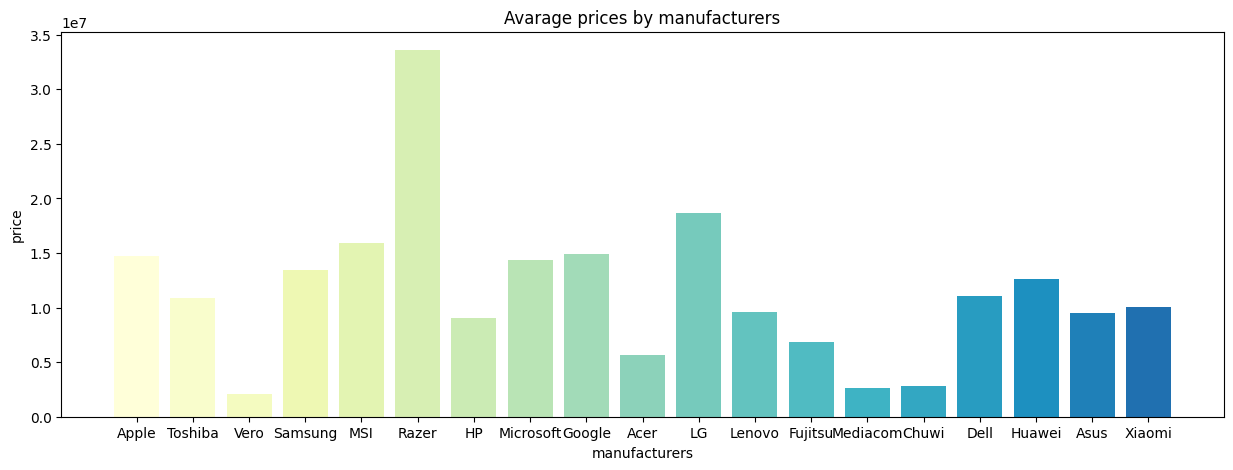

In [ ]:
means = [data[data['Manufacturer']==manufact]['Price'].mean() for manufact in manufacturers]
cm = plt.get_cmap("YlGnBu")
plt.figure(figsize=(15,5))
plt.title("Avarage prices by manufacturers")
plt.bar(manufacturers, means, color = [cm(i*10) for i in range(0,len(manufacturers))])
plt.xlabel("manufacturers")
plt.ylabel("price")
plt.show()

####2.2 Screen Size vs Price

Now we want to see how correlated are screen size and price. So at first let's order data by screen size. Now we can see on the plot that we expect that higher screen size means higher price.

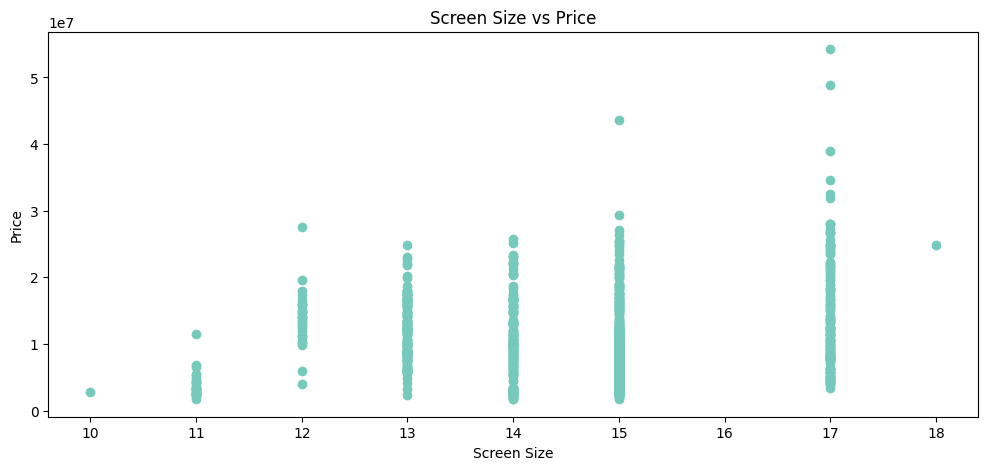

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Screen Size vs Price")
cm = plt.get_cmap('YlGnBu')
xy=[[float(str(data['Screen Size'][i])[:-1]), float(data['Price'][i])] for i in range(len(data['Price']))]
xy.sort(key=lambda x: x[0])
plt.scatter([row[0] for row in xy],[row[1] for row in xy], color=[cm(100)])
plt.xlabel("Screen Size")
plt.ylabel("Price")
plt.show()

#### 2.3 CPU vs Price

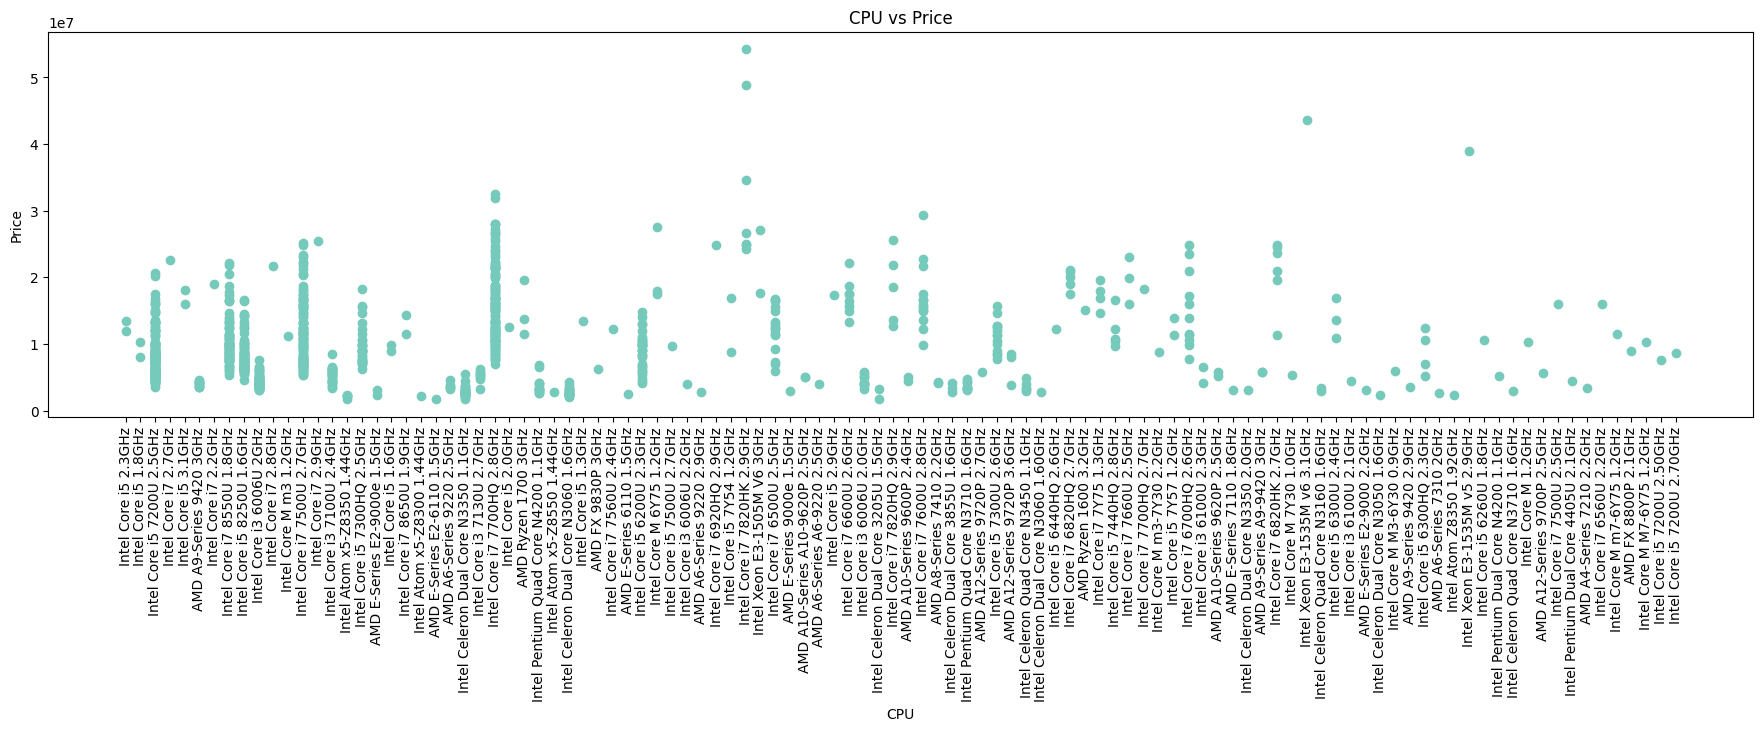

In [ ]:
plt.figure(figsize=(22,5))
plt.title("CPU vs Price")
cm = plt.get_cmap('YlGnBu')
plt.scatter(data['CPU'],data['Price'], color=[cm(100)])
plt.xlabel("CPU")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

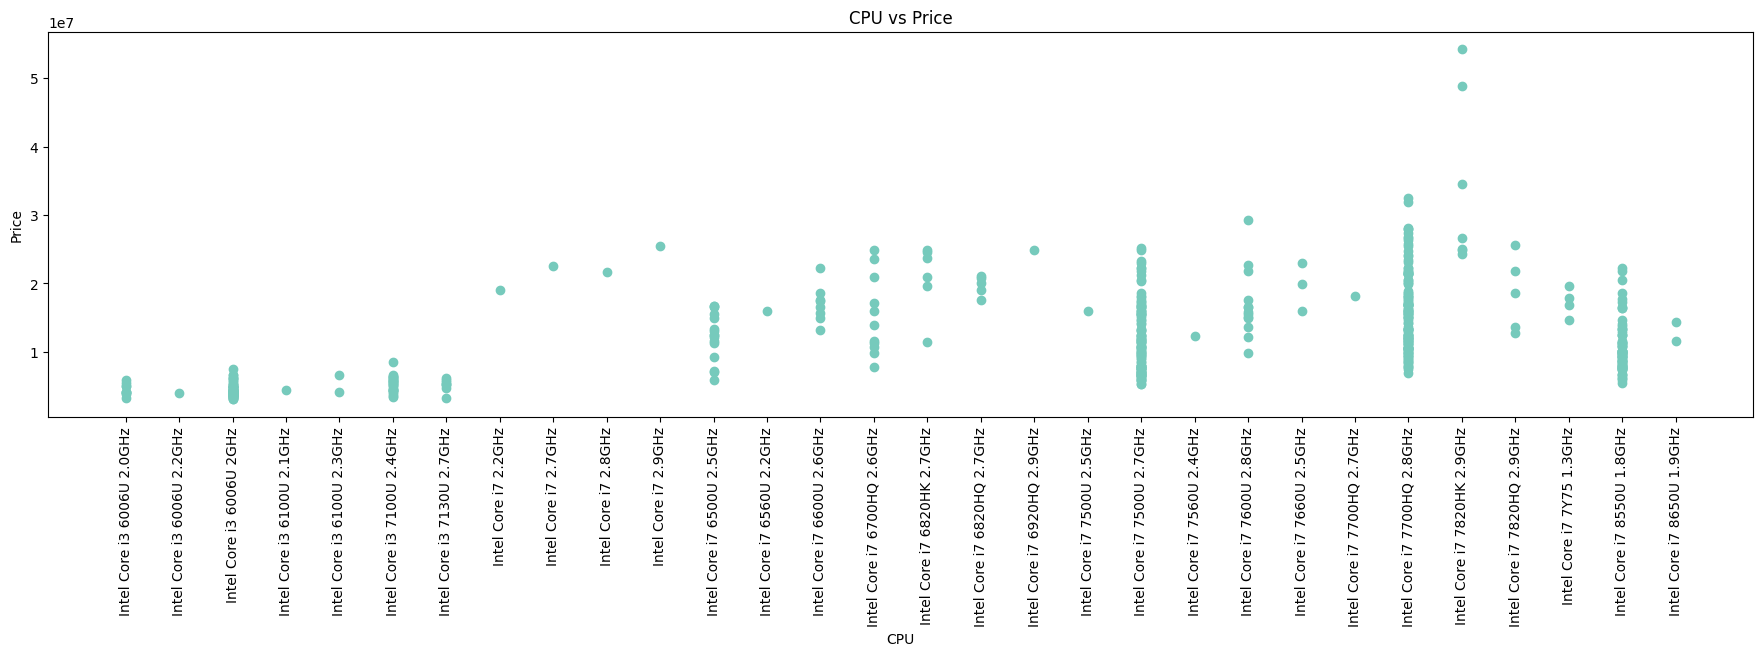

In [ ]:
plt.figure(figsize=(22,5))
plt.title("CPU vs Price")
cm = plt.get_cmap('YlGnBu')

xy=[[data['CPU'][i],data['Price'][i]] for i in range(len(data['CPU']))]
xy = list(filter(lambda x: 'i7' in str(x[0]) or 'i3' in str(x[0]),xy))
xy.sort(key=lambda x: x[0])

plt.scatter([x[0] for x in xy],[x[1] for x in xy], color=[cm(100)])
plt.xlabel("CPU")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

We see that is there are CPUs which we can tell that have lower price, and we can tell which one have higher. Too see it better let's show only Intel Core i7 and i3

And now we see that laptops with intel Core i7 are often more expensive than with intel Core i3

#### 2.4 What kind of laptops are the cheapest?

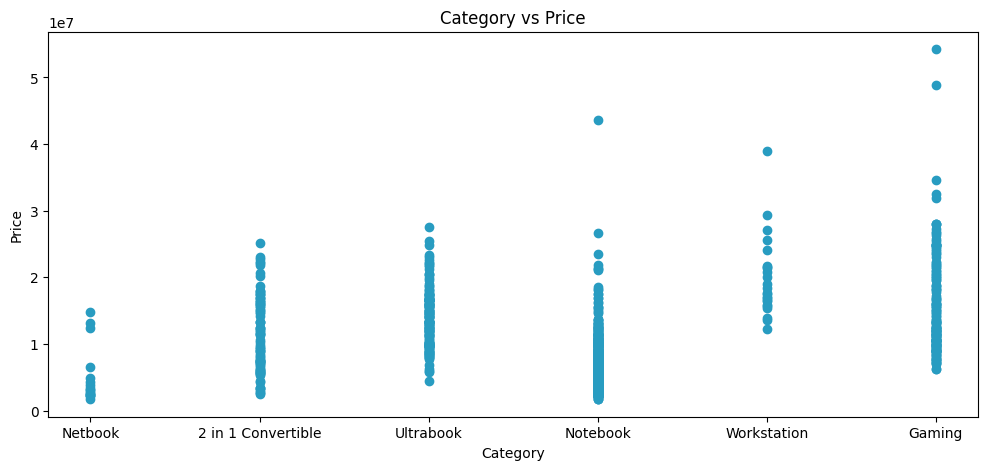

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Category vs Price")
cm = plt.get_cmap('YlGnBu')

xy=[[data['Category'][i],data['Price'][i]] for i in range(len(data['Price']))]

sort_keys = {'Netbook':0, '2 in 1 Convertible':1, 'Ultrabook':2, 'Notebook':3, 'Workstation':4, 'Gaming':5}

xy.sort(key=lambda x: sort_keys[x[0]])

plt.scatter([x[0] for x in xy],[x[1] for x in xy], color=[cm(150)])
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()



And now we see that Gaming laptops are the most expensive and Netbooks the cheapest.

#### 2.5 Is the weight and price correlated?

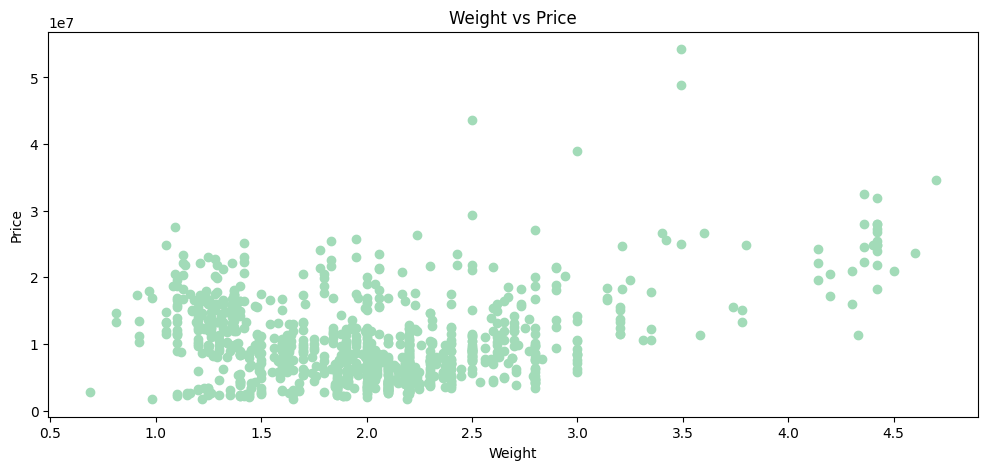

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Weight vs Price")
cm = plt.get_cmap('YlGnBu')

plt.scatter(data['Weight'],data['Price'], color=[cm(80)])
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

It's hard to predict price based on the weight, but we can expect that there is a low correlation between these two variables. To check this we can use method corr() from Pandas library:

In [ ]:
data[['Weight','Price']].corr()

,Weight,Price
Weight,1.000000,0.224415
Price,0.224415,1.000000


The correlation between these two variables is around 22% so it's not high, but there exist some relation between these ones.

####2.3. Boxplot: Ram vs Price

To see how price is changing depending on RAM, we can use a boxplot. Now we see that the highest median of price have laptops with 4GB RAM, and lower with 7, but looking at this plot we expect that there is not a lot of laptops with 7GB RAM. Also we can see that the most outliers have laptops with 2GB RAM

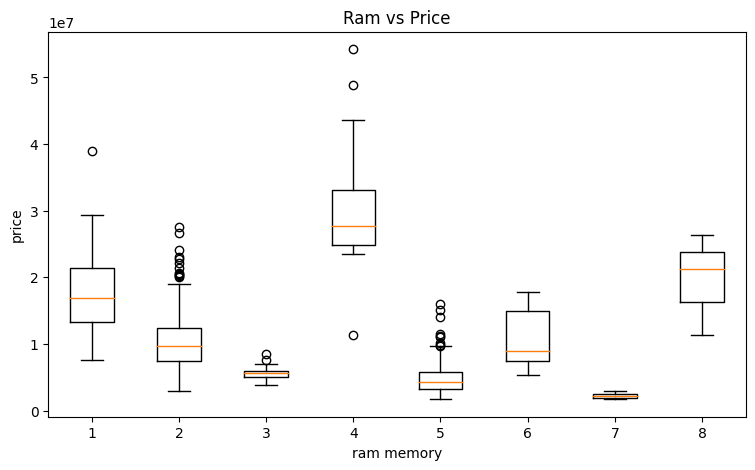

In [ ]:
plt.figure(figsize=(9,5))
plt.title("Ram vs Price")
plt.boxplot([data.loc[data['RAM'] == ram]['Price'] for ram in list(set(data['RAM']))])
plt.xlabel("ram memory")
plt.ylabel("price")
plt.show()

##3. Isolating data

###3.1 We need only Notebooks with 8GB ram, and Windows system

Now, we want to see only statistics of Notebooks with 8GB RAM and Windows. We can isolate our data to new dataset **new_data**.

In [ ]:
new_data = data[(data['Category']=='Notebook') & (data['RAM']=='8GB') & (data['Operating System']=='Windows')]
new_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
16,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2,6624540.0
27,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows,10,2.2,7113600.0
29,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows,10,2.5,7967232.0
37,Dell,Inspiron 5770,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,10,2.8,8705268.0
39,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows,10,2.1,7816068.0


And now we can see basic statistics and compare it with original dataset

In [ ]:
new_data_statistics = new_data[data_numerical].describe()
print(new_data_statistics)

       Screen Size      Weight         Price
count   215.000000  215.000000  2.150000e+02
mean     15.307907    2.040558  8.787659e+06
std       1.057940    0.406556  3.151617e+06
min      13.300000    1.050000  3.458988e+06
25%      14.000000    1.860000  6.788153e+06
50%      15.600000    2.020000  8.367372e+06
75%      15.600000    2.200000  1.022135e+07
max      17.300000    4.420000  2.666711e+07


In [ ]:
data_statistics = data[data_numerical].describe()

Now, let's compare it on the plots

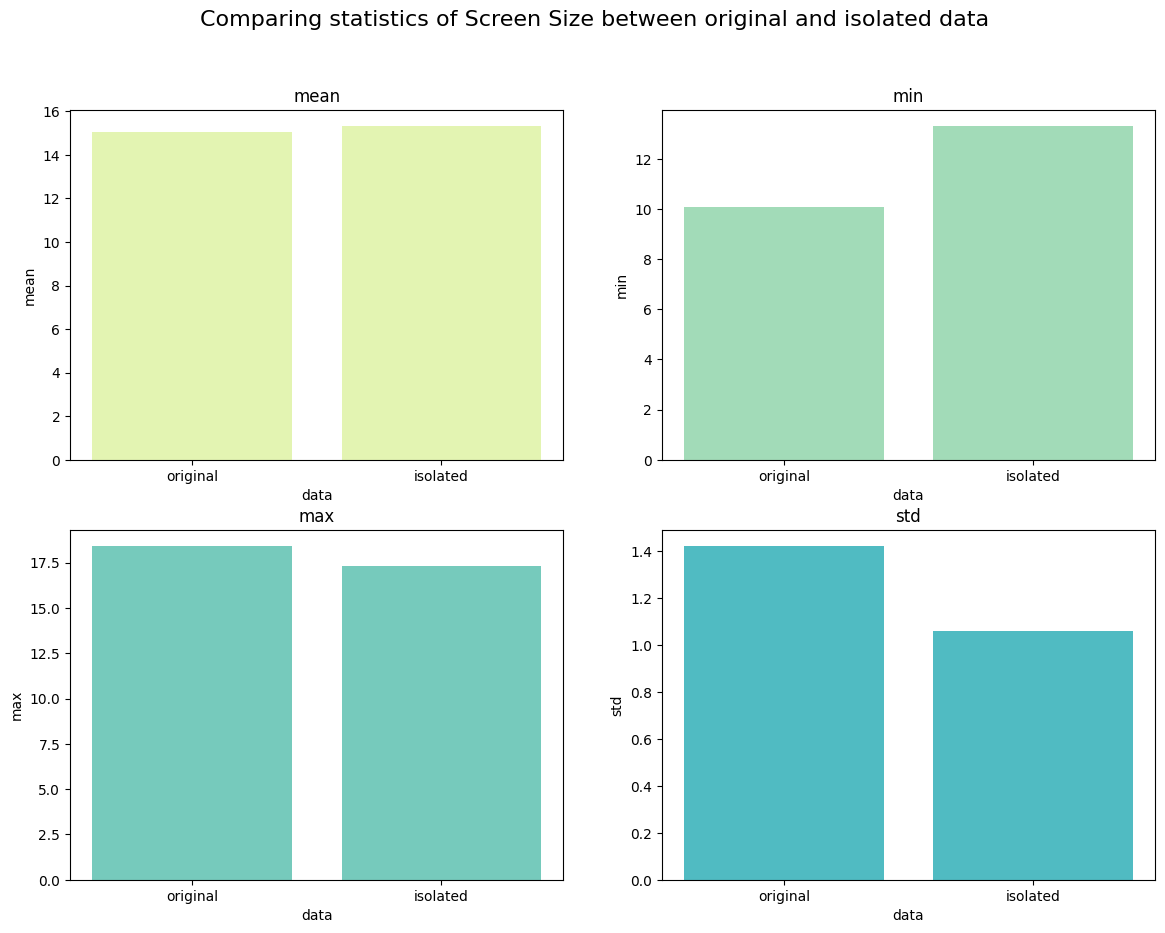

In [ ]:
cm = plt.get_cmap("YlGnBu")

figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(14)
figure.suptitle('Comparing statistics of Screen Size between original and isolated data', fontsize=16)

axis[0,0].bar(['original','isolated'],[data_statistics['Screen Size']['mean'],new_data_statistics['Screen Size']['mean']],color=cm(40))
axis[0,0].set_title("mean")
axis[0,0].set_xlabel("data")
axis[0,0].set_ylabel("mean")

axis[0,1].bar(['original','isolated'],[data_statistics['Screen Size']['min'],new_data_statistics['Screen Size']['min']],color=cm(80))
axis[0,1].set_title("min")
axis[0,1].set_xlabel("data")
axis[0,1].set_ylabel("min")

axis[1,0].bar(['original','isolated'],[data_statistics['Screen Size']['max'],new_data_statistics['Screen Size']['max']], color=cm(100))
axis[1,0].set_title("max")
axis[1,0].set_xlabel("data")
axis[1,0].set_ylabel("max")

axis[1,1].bar(['original','isolated'],[data_statistics['Screen Size']['std'],new_data_statistics['Screen Size']['std']], color=cm(120))
axis[1,1].set_title("std")
axis[1,1].set_xlabel("data")
axis[1,1].set_ylabel("std")

figure.show()

Wee see that mean and maximum of Screen Size didn't change too much, but minimum is higher and standard devation is lower

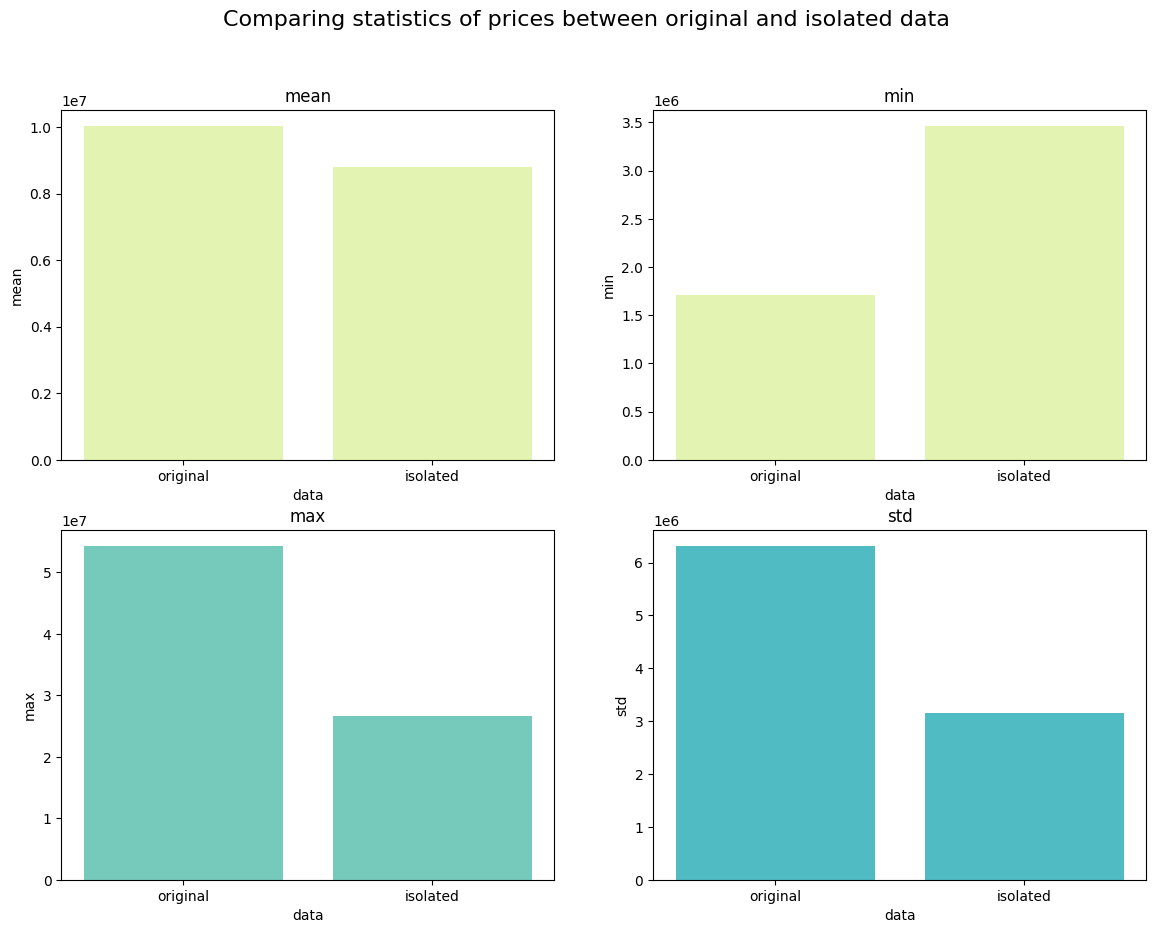

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(14)
figure.suptitle('Comparing statistics of prices between original and isolated data', fontsize=16)

axis[0,0].bar(['original','isolated'],[data_statistics['Price']['mean'],new_data_statistics['Price']['mean']],color=cm(40))
axis[0,0].set_title("mean")
axis[0,0].set_xlabel("data")
axis[0,0].set_ylabel("mean")

axis[0,1].bar(['original','isolated'],[data_statistics['Price']['min'],new_data_statistics['Price']['min']],color=cm(40))
axis[0,1].set_title("min")
axis[0,1].set_xlabel("data")
axis[0,1].set_ylabel("min")

axis[1,0].bar(['original','isolated'],[data_statistics['Price']['max'],new_data_statistics['Price']['max']],color=cm(100))
axis[1,0].set_title("max")
axis[1,0].set_xlabel("data")
axis[1,0].set_ylabel("max")

axis[1,1].bar(['original','isolated'],[data_statistics['Price']['std'],new_data_statistics['Price']['std']], color=cm(120))
axis[1,1].set_title("std")
axis[1,1].set_xlabel("data")
axis[1,1].set_ylabel("std")

figure.show()

And what about prices? Minimum is much higher, maximum and standard devation is much lower.

And now let's compare manufacturer with screen size for this data

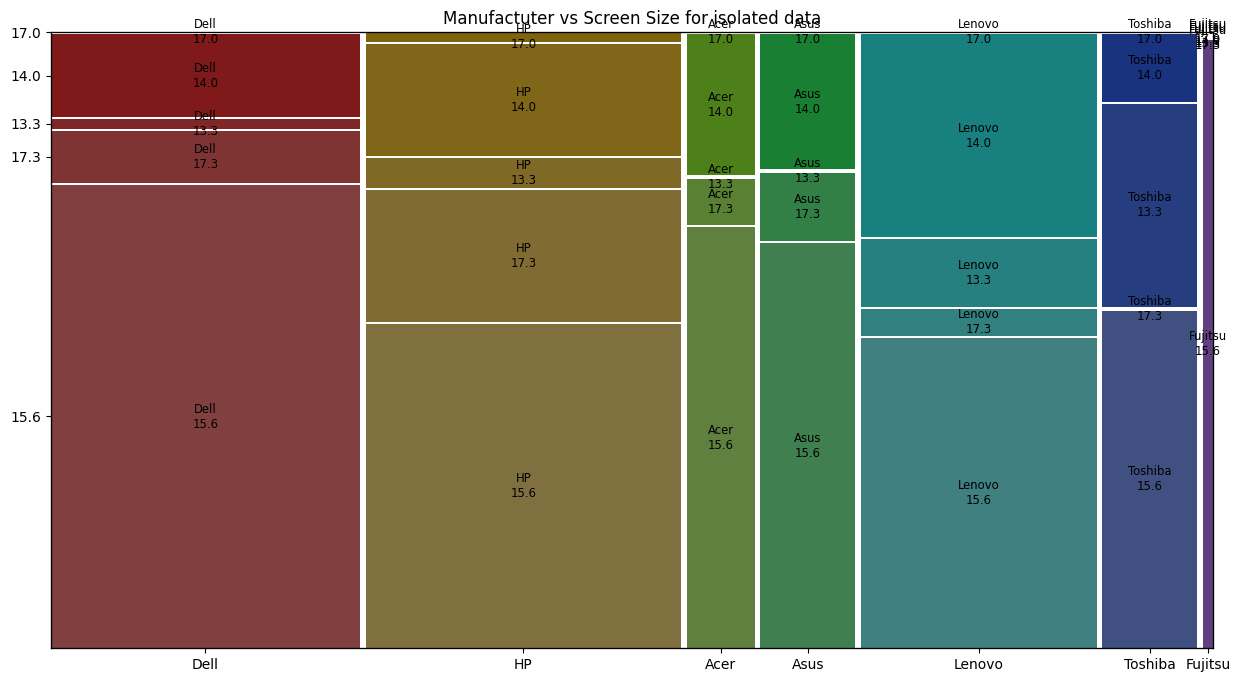

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(15,8)
mosaic(new_data,['Manufacturer','Screen Size'],title="Manufactuter vs Screen Size for isolated data")

plt.show()

Now we want to find three computers from isolated ones with the best price. We can see at the table what the parameteres of these computers are.

In [ ]:
new_data_sorted = new_data.sort_values(by='Price')
new_data_sorted.loc[new_data_sorted.index[0:3]]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
74,Acer,Aspire E5-475,Notebook,14.0,1366x768,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows,10,2.10,3458988.0
571,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows,10,1.94,3458988.0
365,HP,15-AY023na (N3710/8GB/2TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows,10,2.04,3458988.0


##4. Resume

We analyzed and visualized data from this dataset, and saw the most important correllations between variables. Now if we want to predicted prices of laptops, we see what variables we can use for our model.